In [19]:
import matplotlib
import matplotlib.pyplot as plt
import pickle
import torch

In [1]:
#data_address = r'D:\Uni\BA\Development\BruteForce\analysis_outputs\SIS_bull_5k_0.5_0.5'
data_address = r'D:\Uni\BA\Development\BruteForce\analysis_outputs\cml_bull_5k_'
print(data_address)

D:\Uni\BA\Development\BruteForce\analysis_outputs\cml_bull_5k_


In [4]:
scores = list()
for i in range(3):
    help_path = data_address + str(i)
    with open(help_path + '/mean_by_dist.pickle', 'rb') as f:
        mean_by_dist = pickle.load(f)
    with open(help_path + '/max_mean_by_dist.pickle', 'rb') as f:
        max_mean_by_dist = pickle.load(f)
    with open(help_path + '/min_mean_by_dist.pickle', 'rb') as f:
        min_mean_by_dist = pickle.load(f)
scores = torch.stack(scores)

In [5]:
upper_span = max_mean_by_dist - mean_by_dist
lower_span = (-1)*(min_mean_by_dist - mean_by_dist)
spans = torch.stack((lower_span, upper_span))
print(spans.size())

torch.Size([2, 11])


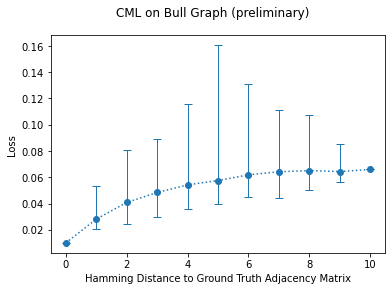

In [6]:
x = range(mean_by_dist.size()[0])
fig, ax = plt.subplots()
ax.set_xlabel('Hamming Distance to Ground Truth Adjacency Matrix')
#ax.set_ylabel('Mean Loss over 10 runs')
ax.set_ylabel('Loss')
ax.errorbar(x, mean_by_dist.numpy(), yerr=spans, capsize=4, elinewidth=1, fmt='o:', )
fig.suptitle('CML on Bull Graph (preliminary)')
plt.show()

In [7]:
fig.savefig('./brute_force_figures/cml_bull_0.png', dpi=300)

## Colab timeout fix

In [1]:
import torch, pickle, os
adr = r"D:\Uni\BA\ColabOutputs\final\bruteforce\CML_5k_4_1take_20/"

In [2]:
for i in range(4):
    with open(adr+str(i) + "/losses.pickle", 'rb') as f:
        losses1 = pickle.load(f)
    if i ==0:
        losses = losses1
    else:
        losses = torch.cat((losses, losses1))
print(len(losses))

1024


In [3]:
save_address =adr+"merged/losses.pickle"
if not os.path.exists(adr+"merged"):
    os.makedirs(adr+"merged")
with open(save_address, 'wb') as f:
    pickle.dump(losses, f)

In [20]:
with open(adr+"0/matrices.pickle", 'wb') as f:
    mat = pickle.load(f)
with open(adr+"merged/matrices.pickle", 'rb') as f:
    pickle.dump(mat, f)

UnsupportedOperation: read

## Merge losses

In [10]:
import torch, pickle
base_address = r"D:\Uni\BA\ColabOutputs\colab_cml_bull_5k"

In [11]:
losses_ls = list()
for i in range(5):
    help_path = base_address + '/'+ str(i) + "/losses.pickle"
    with open(help_path, 'rb') as f:
        losses_ls.append(pickle.load(f))
losses = torch.cat(losses_ls, dim=1)
print(losses_ls[0].size())
print(losses.size())

torch.Size([1024, 1])
torch.Size([1024, 5])


In [13]:
save_address = r"D:\Uni\BA\ColabOutputs\colab_cml_bull_5k\joint_01234\losses.pickle"
with open(save_address, 'wb') as f:
    pickle.dump(losses, f)